<a href="https://colab.research.google.com/github/seanigens/Cloud-Computing-Assignment-2/blob/main/S521Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:
Sam Kasiff,
Sean Patrick King


In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df0 = pd.read_csv("/content/drive/My Drive/Cloud Assignment 2/2023_place_canvas_history-000000000000.csv")

In [ ]:
df0_subset=df0.sample(frac=.001, random_state=42)
df0_subset.head()

,timestamp,user,coordinate,pixel_color
960359,2023-07-20 14:30:21.109 UTC,6gtoR1X4KFRKFfe9fn85wUxAPUHdXbJISc0WDQMjeOaIE2...,"309,102",#B44AC0
2125973,2023-07-20 15:43:20.16 UTC,YNMfbbRTXxtCuYU4AoPzSABNtaeDjkLsghOLxybHkYOB7j...,"225,-235",#000000
252849,2023-07-20 13:34:27.355 UTC,3dAUa5dnQwPC5wJFQMPn/SPub3X5YXbRBPBLKkg1+PqiWe...,"-471,461",#3690EA
2327307,2023-07-20 15:55:03.453 UTC,MXitXa6kyu1HfY5Yq3UHLPw4kQGpr5HUsnsZGPHD7JP0XF...,"-448,-384",#FFD635
1050347,2023-07-20 14:36:31.397 UTC,t/DtzSJ+u/vhhekerRw/T+pp4F6oCrECcSrGlHZ1u+g75H...,"-462,-451",#000000


In [ ]:
split_columns = df0_subset['coordinate'].str.split(',', expand=True)

# Assign the split columns to new columns in df0
df0_subset['coordinate_x'] = split_columns[0].astype(int)
df0_subset['coordinate_y'] = split_columns[1].astype(int)
df0_subset.head()

,timestamp,user,coordinate,pixel_color,coordinate_x,coordinate_y
960359,2023-07-20 14:30:21.109 UTC,6gtoR1X4KFRKFfe9fn85wUxAPUHdXbJISc0WDQMjeOaIE2...,"309,102",#B44AC0,309,102
2125973,2023-07-20 15:43:20.16 UTC,YNMfbbRTXxtCuYU4AoPzSABNtaeDjkLsghOLxybHkYOB7j...,"225,-235",#000000,225,-235
252849,2023-07-20 13:34:27.355 UTC,3dAUa5dnQwPC5wJFQMPn/SPub3X5YXbRBPBLKkg1+PqiWe...,"-471,461",#3690EA,-471,461
2327307,2023-07-20 15:55:03.453 UTC,MXitXa6kyu1HfY5Yq3UHLPw4kQGpr5HUsnsZGPHD7JP0XF...,"-448,-384",#FFD635,-448,-384
1050347,2023-07-20 14:36:31.397 UTC,t/DtzSJ+u/vhhekerRw/T+pp4F6oCrECcSrGlHZ1u+g75H...,"-462,-451",#000000,-462,-451


In [ ]:
df0_subset['R'] = df0_subset['pixel_color'].apply(lambda x: int(x[1:3], 16))
df0_subset['G'] = df0_subset['pixel_color'].apply(lambda x: int(x[3:5], 16))
df0_subset['B'] = df0_subset['pixel_color'].apply(lambda x: int(x[5:], 16))
df0_subset.head()

,timestamp,user,coordinate,pixel_color,coordinate_x,coordinate_y,R,G,B
960359,2023-07-20 14:30:21.109 UTC,6gtoR1X4KFRKFfe9fn85wUxAPUHdXbJISc0WDQMjeOaIE2...,"309,102",#B44AC0,309,102,180,74,192
2125973,2023-07-20 15:43:20.16 UTC,YNMfbbRTXxtCuYU4AoPzSABNtaeDjkLsghOLxybHkYOB7j...,"225,-235",#000000,225,-235,0,0,0
252849,2023-07-20 13:34:27.355 UTC,3dAUa5dnQwPC5wJFQMPn/SPub3X5YXbRBPBLKkg1+PqiWe...,"-471,461",#3690EA,-471,461,54,144,234
2327307,2023-07-20 15:55:03.453 UTC,MXitXa6kyu1HfY5Yq3UHLPw4kQGpr5HUsnsZGPHD7JP0XF...,"-448,-384",#FFD635,-448,-384,255,214,53
1050347,2023-07-20 14:36:31.397 UTC,t/DtzSJ+u/vhhekerRw/T+pp4F6oCrECcSrGlHZ1u+g75H...,"-462,-451",#000000,-462,-451,0,0,0


In [ ]:
df0_subset['timestamp'] = df0_subset['timestamp'].dt.tz_localize(None)
start_date = pd.to_datetime('7/20/2023').tz_localize(None)


In [ ]:
df0_subset['timestamp'] = pd.to_datetime(df0_subset['timestamp'], errors='coerce')

# Define the start date
start_date = pd.to_datetime('7/20/2023')

# Calculate the difference in days and add 1 to start the count from 1
df0_subset['Day'] = (df0_subset['timestamp'] - start_date).dt.days + 1
df0_subset.head()

,timestamp,user,coordinate,pixel_color,coordinate_x,coordinate_y,R,G,B,Day
960359,2023-07-20 14:30:21.109,6gtoR1X4KFRKFfe9fn85wUxAPUHdXbJISc0WDQMjeOaIE2...,"309,102",#B44AC0,309,102,180,74,192,1
2125973,2023-07-20 15:43:20.160,YNMfbbRTXxtCuYU4AoPzSABNtaeDjkLsghOLxybHkYOB7j...,"225,-235",#000000,225,-235,0,0,0,1
252849,2023-07-20 13:34:27.355,3dAUa5dnQwPC5wJFQMPn/SPub3X5YXbRBPBLKkg1+PqiWe...,"-471,461",#3690EA,-471,461,54,144,234,1
2327307,2023-07-20 15:55:03.453,MXitXa6kyu1HfY5Yq3UHLPw4kQGpr5HUsnsZGPHD7JP0XF...,"-448,-384",#FFD635,-448,-384,255,214,53,1
1050347,2023-07-20 14:36:31.397,t/DtzSJ+u/vhhekerRw/T+pp4F6oCrECcSrGlHZ1u+g75H...,"-462,-451",#000000,-462,-451,0,0,0,1


In [ ]:
df0 = pd.read_csv("/content/drive/My Drive/Cloud Assignment 2/2023_place_canvas_history-000000000000.csv")

df0_subset=df0.sample(frac=.001, random_state=42)
df0_subset.head()

split_columns = df0_subset['coordinate'].str.split(',', expand=True)

# Assign the split columns to new columns in df0
df0_subset['coordinate_x'] = split_columns[0].astype(int)
df0_subset['coordinate_y'] = split_columns[1].astype(int)
df0_subset.head()

df0_subset['R'] = df0_subset['pixel_color'].apply(lambda x: int(x[1:3], 16))
df0_subset['G'] = df0_subset['pixel_color'].apply(lambda x: int(x[3:5], 16))
df0_subset['B'] = df0_subset['pixel_color'].apply(lambda x: int(x[5:], 16))
df0_subset.head()

df0_subset['timestamp'] = df0_subset['timestamp'].dt.tz_localize(None)
start_date = pd.to_datetime('7/20/2023').tz_localize(None)

# Assuming df is your DataFrame and 'timestamp' is your timestamp column
# Convert the 'timestamp' column to datetime, handling errors
df0_subset['timestamp'] = pd.to_datetime(df0_subset['timestamp'], errors='coerce')

# Define the start date
start_date = pd.to_datetime('7/20/2023')

# Calculate the difference in days and add 1 to start the count from 1
df0_subset['Day'] = (df0_subset['timestamp'] - start_date).dt.days + 1
df0_subset.head()

In [ ]:
import pandas as pd
import os

# Initialize an empty list to store the dataframes
dataframes = []

# Define the start date
start_date = pd.to_datetime('7/20/2023').tz_localize(None)

# Iterate through the file numbers
for i in range(53):
    # Construct the file name
    file_name = f"/content/drive/My Drive/Cloud Assignment 2/2023_place_canvas_history-0000000000{i:02}.csv"

    # Read the CSV file
    df = pd.read_csv(file_name)

    # Sample a fraction of the data
    df_subset = df.sample(frac=.001, random_state=42)

    # Preprocess 'coordinate' and split into 'coordinate_x' and 'coordinate_y'
    # Allow negative numbers by including '-' in the regex
    df_subset['coordinate'] = df_subset['coordinate'].str.replace('[^\d,-]', '', regex=True)  # Include '-' for negative numbers
    split_columns = df_subset['coordinate'].str.split(',', expand=True)
    df_subset['coordinate_x'] = split_columns[0].astype(int)
    df_subset['coordinate_y'] = split_columns[1].astype(int)

    # Extract R, G, B from 'pixel_color'
    df_subset['R'] = df_subset['pixel_color'].apply(lambda x: int(x[1:3], 16))
    df_subset['G'] = df_subset['pixel_color'].apply(lambda x: int(x[3:5], 16))
    df_subset['B'] = df_subset['pixel_color'].apply(lambda x: int(x[5:], 16))

    # Convert 'timestamp' to datetime and localize
    df_subset['timestamp'] = pd.to_datetime(df_subset['timestamp'], errors='coerce').dt.tz_localize(None)

    # Calculate the 'Day' column based on 'timestamp'
    df_subset['Day'] = (df_subset['timestamp'] - start_date).dt.days + 1

    # Append the processed dataframe to the list
    dataframes.append(df_subset)

# Concatenate all dataframes in the list
final_df1 = pd.concat(dataframes, ignore_index=True)

# Optional: Save the final dataframe to a new CSV file
# final_df.to_csv("/content/drive/My Drive/Cloud Assignment 2/final_dataframe.csv", index=False)

# Display the head of the final dataframe
print(final_df1.head())


                timestamp                                               user  \
0 2023-07-20 14:30:21.109  6gtoR1X4KFRKFfe9fn85wUxAPUHdXbJISc0WDQMjeOaIE2...   
1 2023-07-20 15:43:20.160  YNMfbbRTXxtCuYU4AoPzSABNtaeDjkLsghOLxybHkYOB7j...   
2 2023-07-20 13:34:27.355  3dAUa5dnQwPC5wJFQMPn/SPub3X5YXbRBPBLKkg1+PqiWe...   
3 2023-07-20 15:55:03.453  MXitXa6kyu1HfY5Yq3UHLPw4kQGpr5HUsnsZGPHD7JP0XF...   
4 2023-07-20 14:36:31.397  t/DtzSJ+u/vhhekerRw/T+pp4F6oCrECcSrGlHZ1u+g75H...   

  coordinate pixel_color  coordinate_x  coordinate_y    R    G    B  Day  
0    309,102     #B44AC0           309           102  180   74  192    1  
1   225,-235     #000000           225          -235    0    0    0    1  
2   -471,461     #3690EA          -471           461   54  144  234    1  
3  -448,-384     #FFD635          -448          -384  255  214   53    1  
4  -462,-451     #000000          -462          -451    0    0    0    1  


In [ ]:
final_df1.to_csv("/content/drive/My Drive/Cloud Assignment 2/final_dataframe1.csv", index=False)

In [ ]:
final_df2 = pd.read_csv("/content/drive/My Drive/Cloud Assignment 2/final_dataframe1.csv")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


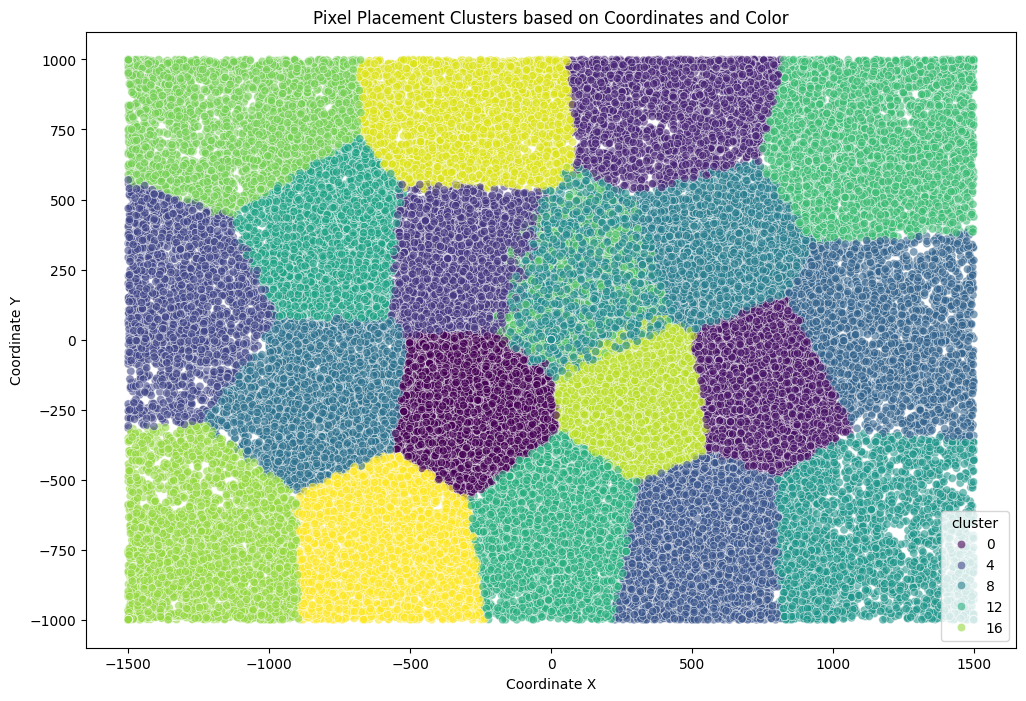

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the features for clustering
features = final_df2[['coordinate_x', 'coordinate_y', 'R', 'G', 'B']]

# Running KMeans clustering
# Let's choose 5 clusters for demonstration purposes
kmeans = KMeans(n_clusters=20, random_state=0).fit(features)

# Assign the cluster centers
final_df2['cluster'] = kmeans.labels_

# Visualizing the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=final_df2, x='coordinate_x', y='coordinate_y', hue='cluster', palette='viridis', alpha=0.6)
plt.title('Pixel Placement Clusters based on Coordinates and Color')
plt.xlabel('Coordinate X')
plt.ylabel('Coordinate Y')
plt.show()

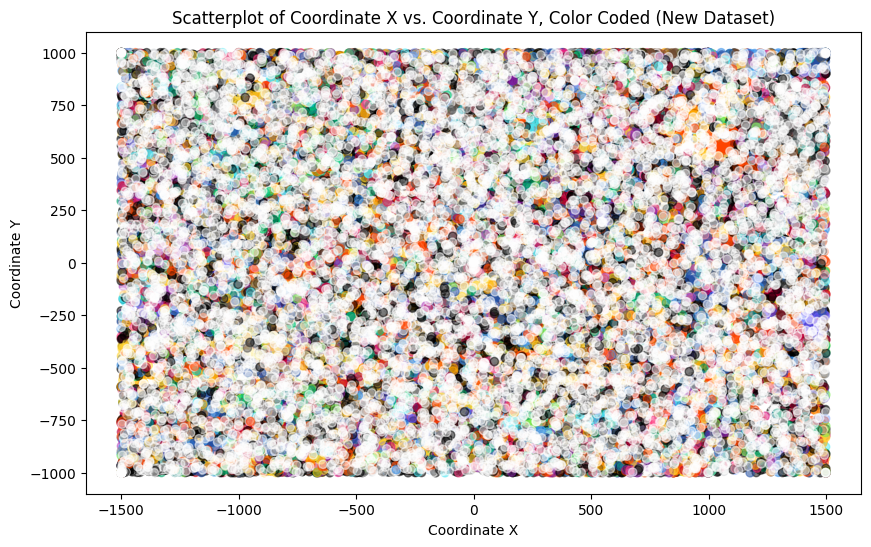

In [ ]:
# Prepare data for the scatterplot from the new dataset
x_new = final_df2['coordinate_x']
y_new = final_df2['coordinate_y']
colors_new = final_df2[['R', 'G', 'B']].values / 255  # Normalize the color values

# Create scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(x_new, y_new, c=colors_new, alpha=0.5)

# Adding title and labels
plt.title('Scatterplot of Coordinate X vs. Coordinate Y, Color Coded (New Dataset)')
plt.xlabel('Coordinate X')
plt.ylabel('Coordinate Y')

# Show plot
plt.show()

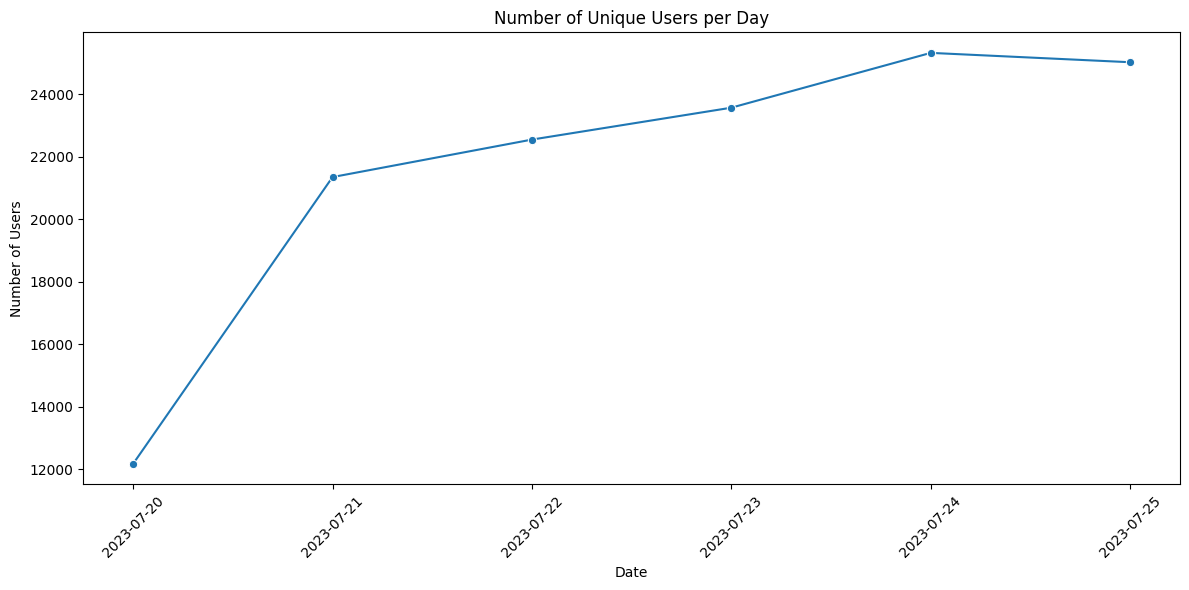

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Convert timestamp to datetime and extract date
final_df2['timestamp'] = pd.to_datetime(final_df2['timestamp'])
final_df2['date'] = final_df2['timestamp'].dt.date

# Count the number of users per day
users_per_day = final_df2.groupby('date')['user'].nunique()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x=users_per_day.index, y=users_per_day.values, marker='o')
plt.title('Number of Unique Users per Day')
plt.ylabel('Number of Users')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
data = final_df2

# Counting the occurrence of each color and identifying the most common one
color_counts = data['pixel_color'].value_counts()
most_common_color = color_counts.idxmax()
most_common_color_count = color_counts.max()

most_common_color, most_common_color_count

('#000000', 28706)